# Zillow Neighborhood Dataset Analysis 



- It is strongly recommended you use the standard `pd`, `np`, `plt` and `sns` namespaces for these popular libraries


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load the Zillow dataset

In [2]:
df = pd.read_csv("Neighborhood_Zhvi_AllHomes.csv")
df.head()

RegionID         RegionName         City State  \
0    274772   Northeast Dallas       Dallas    TX   
1    192689           Paradise    Las Vegas    NV   
2    270958    Upper West Side     New York    NY   
3    118208  South Los Angeles  Los Angeles    CA   
4    270957    Upper East Side     New York    NY   

                            Metro          CountyName  SizeRank   1996-04  \
0     Dallas-Fort Worth-Arlington       Dallas County         1  135800.0   
1    Las Vegas-Henderson-Paradise        Clark County         2  119400.0   
2     New York-Newark-Jersey City     New York County         3  299500.0   
3  Los Angeles-Long Beach-Anaheim  Los Angeles County         4  122700.0   
4     New York-Newark-Jersey City     New York County         5  339400.0   

    1996-05   1996-06   ...     2018-05  2018-06  2018-07  2018-08  2018-09  \
0  135500.0  134900.0   ...      315500   316800   317500   317700   318500   
1  119400.0  119300.0   ...      241100   244400   247600   251200   254600   
2  299700.0  299600.0   ...     1399100  1391700  1383800  1379000  1370200   
3  122900.0  123100.0   ...      462200   464700   467000   469400   472000   
4  339900.0  340500.0   ...     1383300  1383300  1367200  1357300  1345000   

   2018-10  2018-11  2018-12  2019-01  2019-02  
0   320600   324500   330200   336400   339900  
1   257600   260100   261500   262200   262800  
2  1360500  1349200  1336000  1323800  1317100  
3   474400   476300   478700   482200   484800  
4  1327500  1312800  1301500  1287200  1275600  

[5 rows x 282 columns]

In [3]:
df.shape

(7439, 282)

In [181]:
#plt.hist(df["2019-02"]);

In [180]:
#plt.hist(df["2005-02"]);

In [179]:
#sns.distplot(df["2005-02"]);

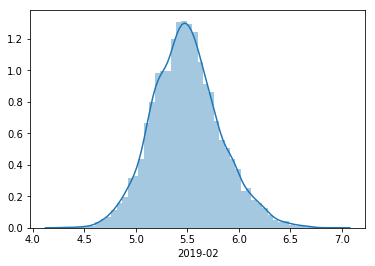

In [4]:
sns.distplot(np.log10(df["2019-02"]));

## San Diego Analysis

Let's focus on understanding price changes in San Diego over time.

### Tidy Data
- Each variable you measure should be in one column.
- Each different observation of that variable should be in a different row.


In [20]:
df.head()

RegionID         RegionName         City State  \
0    274772   Northeast Dallas       Dallas    TX   
1    192689           Paradise    Las Vegas    NV   
2    270958    Upper West Side     New York    NY   
3    118208  South Los Angeles  Los Angeles    CA   
4    270957    Upper East Side     New York    NY   

                            Metro          CountyName  SizeRank   1996-04  \
0     Dallas-Fort Worth-Arlington       Dallas County         1  135800.0   
1    Las Vegas-Henderson-Paradise        Clark County         2  119400.0   
2     New York-Newark-Jersey City     New York County         3  299500.0   
3  Los Angeles-Long Beach-Anaheim  Los Angeles County         4  122700.0   
4     New York-Newark-Jersey City     New York County         5  339400.0   

    1996-05   1996-06   ...     2018-05  2018-06  2018-07  2018-08  2018-09  \
0  135500.0  134900.0   ...      315500   316800   317500   317700   318500   
1  119400.0  119300.0   ...      241100   244400   247600   251200   254600   
2  299700.0  299600.0   ...     1399100  1391700  1383800  1379000  1370200   
3  122900.0  123100.0   ...      462200   464700   467000   469400   472000   
4  339900.0  340500.0   ...     1383300  1383300  1367200  1357300  1345000   

   2018-10  2018-11  2018-12  2019-01  2019-02  
0   320600   324500   330200   336400   339900  
1   257600   260100   261500   262200   262800  
2  1360500  1349200  1336000  1323800  1317100  
3   474400   476300   478700   482200   484800  
4  1327500  1312800  1301500  1287200  1275600  

[5 rows x 282 columns]

- Our data is not tidy! 
Each price for each year is a different observation so should be in different row!

- `pd.melt` reshapes our data into the tidy format

In [5]:
df_m = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 
                            'Metro', 'CountyName','SizeRank'])

df_m.head()

RegionID         RegionName         City State  \
0    274772   Northeast Dallas       Dallas    TX   
1    192689           Paradise    Las Vegas    NV   
2    270958    Upper West Side     New York    NY   
3    118208  South Los Angeles  Los Angeles    CA   
4    270957    Upper East Side     New York    NY   

                            Metro          CountyName  SizeRank variable  \
0     Dallas-Fort Worth-Arlington       Dallas County         1  1996-04   
1    Las Vegas-Henderson-Paradise        Clark County         2  1996-04   
2     New York-Newark-Jersey City     New York County         3  1996-04   
3  Los Angeles-Long Beach-Anaheim  Los Angeles County         4  1996-04   
4     New York-Newark-Jersey City     New York County         5  1996-04   

      value  
0  135800.0  
1  119400.0  
2  299500.0  
3  122700.0  
4  339400.0

In [6]:
df_m.shape

(2045725, 9)

In [7]:
df_sd = df_m[df_m.CountyName == 'San Diego County']

df_sd.head()

RegionID          RegionName         City State               Metro  \
86     343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
88     116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
157    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
168    118673     University City    San Diego    CA  San Diego-Carlsbad   
174    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

           CountyName  SizeRank variable     value  
86   San Diego County        87  1996-04  139400.0  
88   San Diego County        89  1996-04  153900.0  
157  San Diego County       158  1996-04  147600.0  
168  San Diego County       169  1996-04  175700.0  
174  San Diego County       175  1996-04  202400.0

Lets explore how the median price of homes in each region has changed over time. 

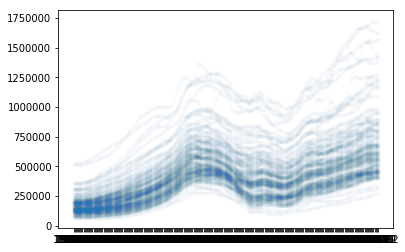

In [8]:
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);

- We get a good idea of the trends but over-plotting on the x-ticks makes it impossible to read. 

- We need to reduce the resolution of the x-ticks. 

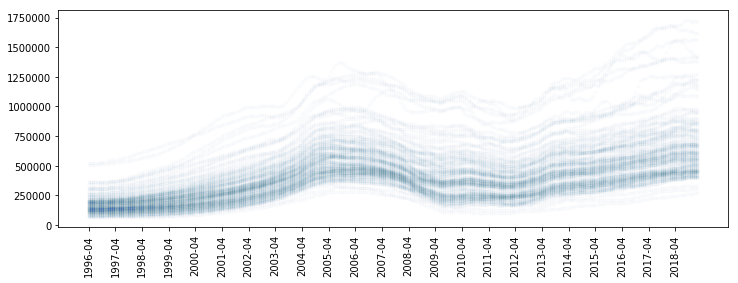

In [9]:
plt.figure(figsize=(12,4))
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);

labels = []
pos = []
for i, item in enumerate(pd.unique(df_sd.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item)

plt.xticks(pos, labels, rotation = 90);


In [10]:
region_names = list(pd.unique(df_sd.RegionName))
len(region_names)

122

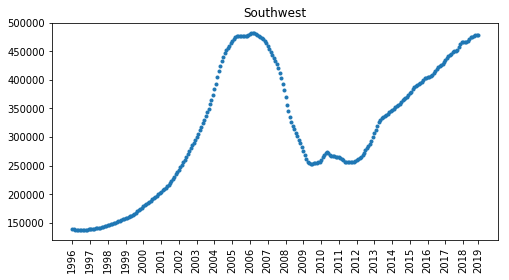

In [11]:
plt.figure(figsize=(8,4))
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_region.variable, df_region.value, '.')
labels = []
pos = []
for i, item in enumerate(pd.unique(df_region.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item.split("-")[0])
        
# inclue the last tick in the positions even 
# if it is not modulo 12
pos.append(i)
labels.append(item.split("-")[0])
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

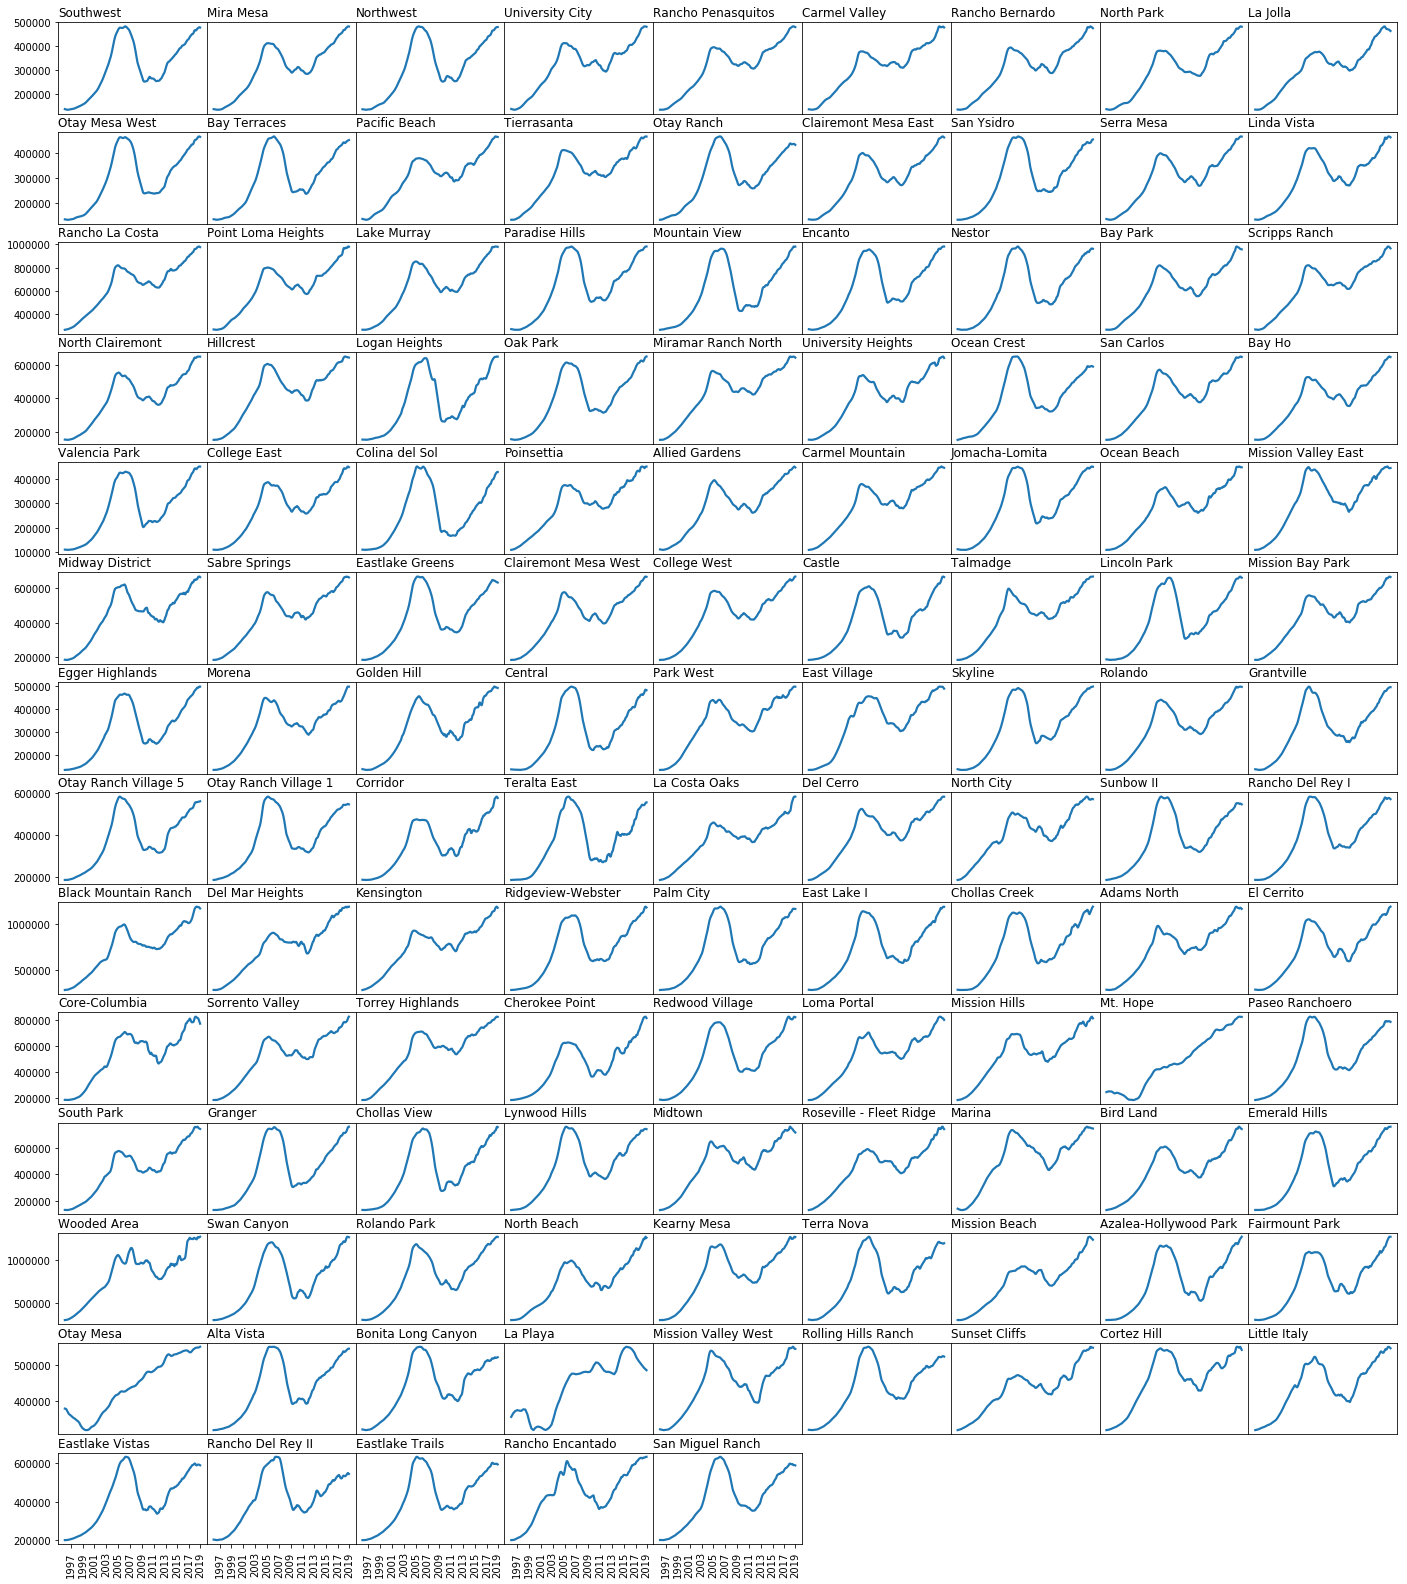

In [12]:
plt.figure(figsize = (24,28))
num_cols_in_subplot = 9
for i, region_name in enumerate(region_names):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # subset the data to just a specific region 
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             label = region_name)
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

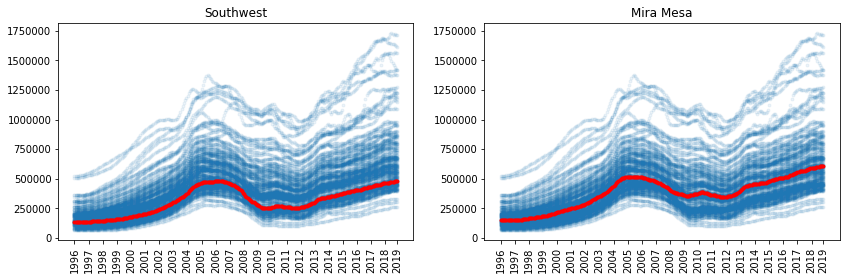

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



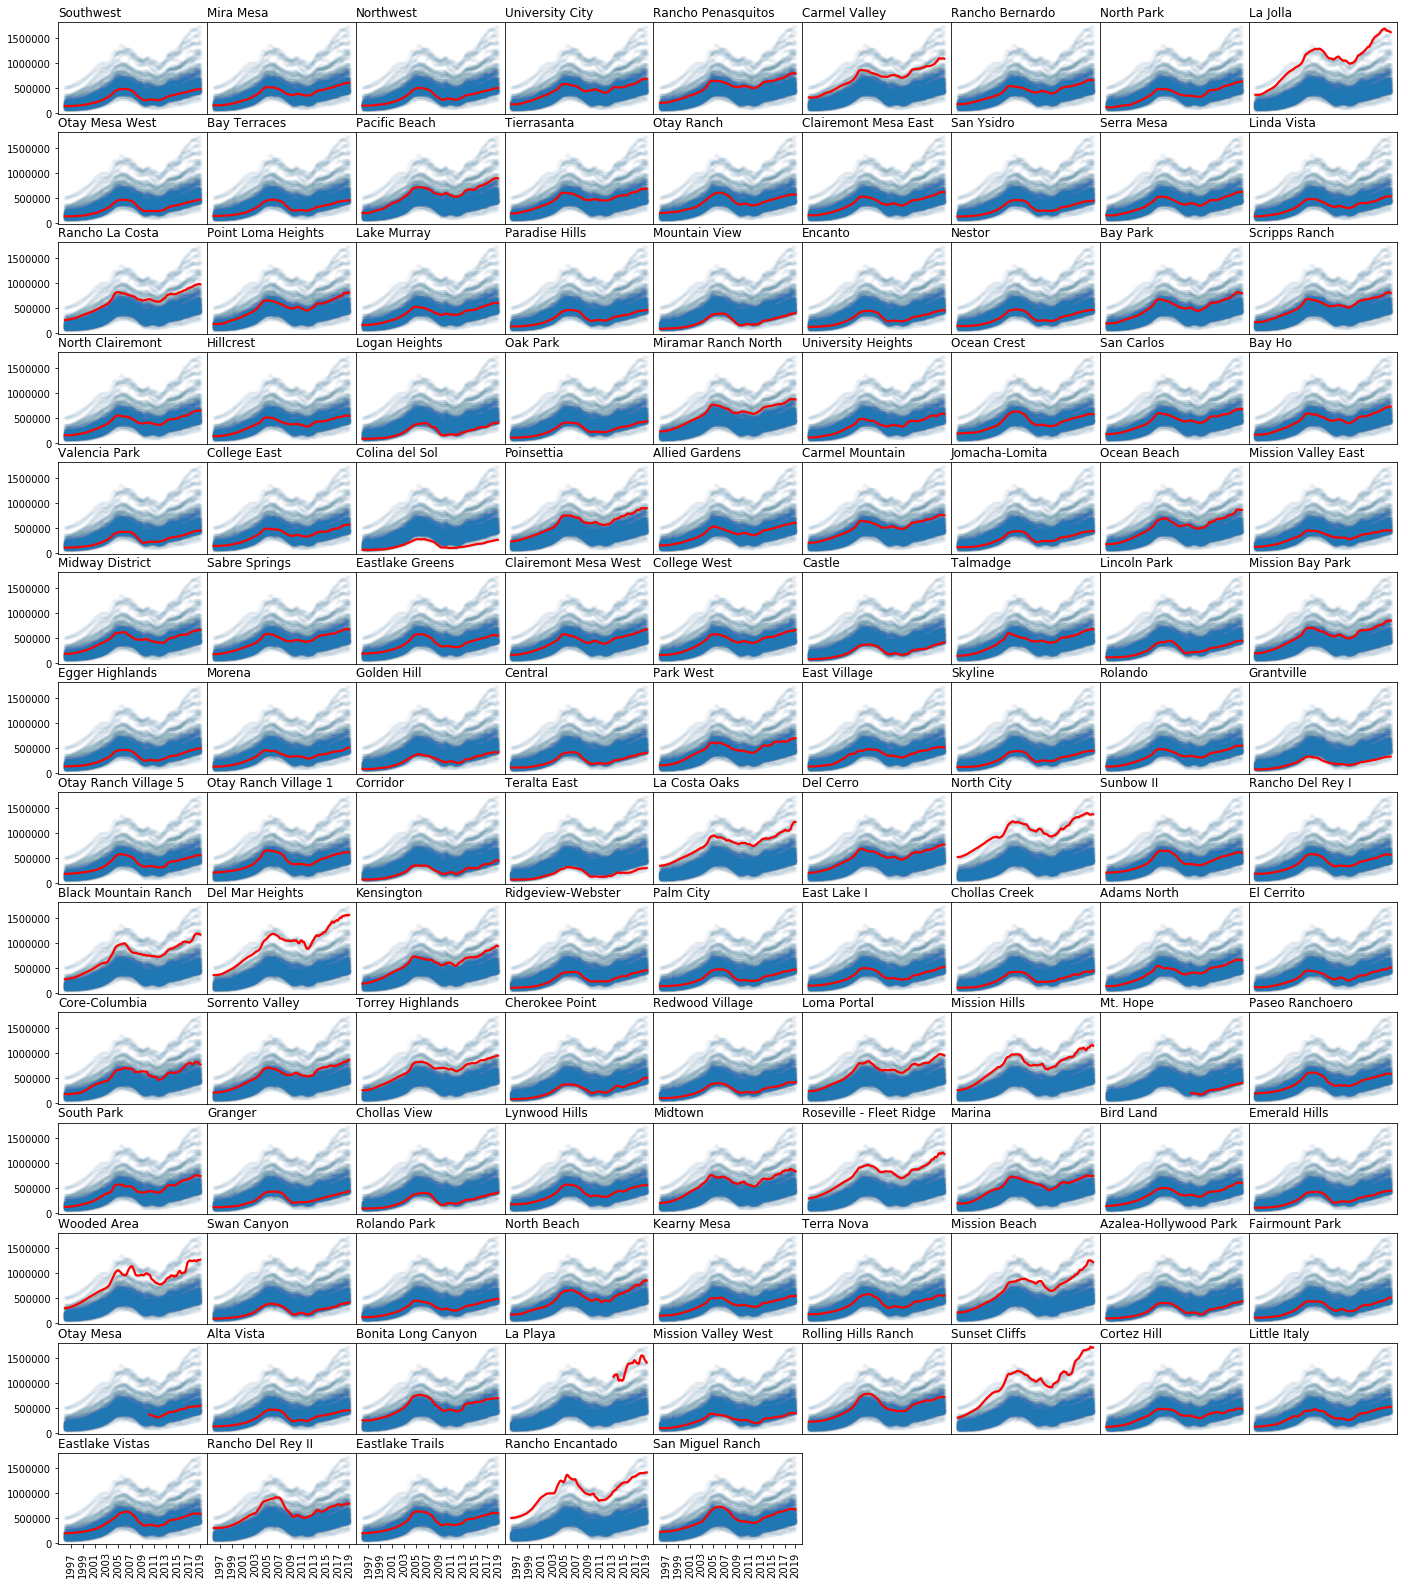

In [14]:
plt.figure(figsize = (24,28))

num_cols_in_subplot = 9
for i, region_name in enumerate(region_names):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # plot all the regions but very lightly small alpha
    plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
    # subset the data to just a specific region 
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             color = "red", label = region_name)
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

### Bubble Analysis

- The peak of the bubble occurred around 2005. 
- Instead of looking at prices at all time points in the data, lets compare prices at the height of the bubble with today. 
- We pick February 2005 as the "height" to correspond with the 14 years prior to the latest observations we have. 

In [15]:
df_latest = df_sd[df_sd.variable == df_sd.variable.max()]
df_bubble = df_sd[df_sd.variable == '2005-02']
df_change = pd.concat([df_bubble, df_latest], ignore_index=True)

df_change.head()

RegionID          RegionName         City State               Metro  \
0    343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
1    116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
2    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
3    118673     University City    San Diego    CA  San Diego-Carlsbad   
4    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

         CountyName  SizeRank variable     value  
0  San Diego County        87  2005-02  459700.0  
1  San Diego County        89  2005-02  511300.0  
2  San Diego County       158  2005-02  479800.0  
3  San Diego County       169  2005-02  577800.0  
4  San Diego County       175  2005-02  644900.0

## Slope Graphs

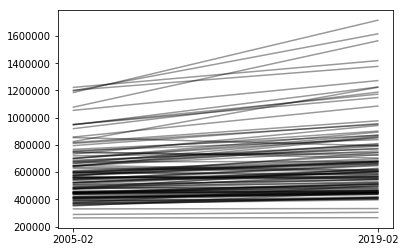

In [16]:
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)


We have too much over-plotting! 

Over-plotting solution: only plot the regions that have "large" changes. Might be also interesting to look at regions that went "negative" (have yet to recover from the crash). 

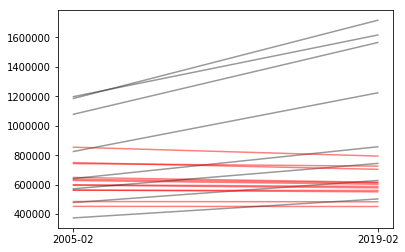

In [45]:
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 30):
        plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
    elif change < 0:
        plt.plot(df_region.variable, df_region.value, color = "r", alpha = .5)

Which neighborhoods are the biggest movers? Which neighborhoods did not recover?

In [47]:
# for i, region_name in enumerate(region_names):
#     df_region = df_change[df_change.RegionName == region_name]
#     change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
#     percent_change = 100*change/df_region.iloc[0,:]["value"]
#     if (change > 0) & (percent_change > 30):
#         plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
#         plt.annotate(# Label and coordinate
#             'This point is interesting!', xy=("2019-2", 1600000), xytext=(0, 80),
 
#             # Custom arrow
#             arrowprops=dict(facecolor='black', shrink=0.05))

#     elif change < 0:
#         plt.plot(df_region.variable, df_region.value, color = "r", alpha = .9)

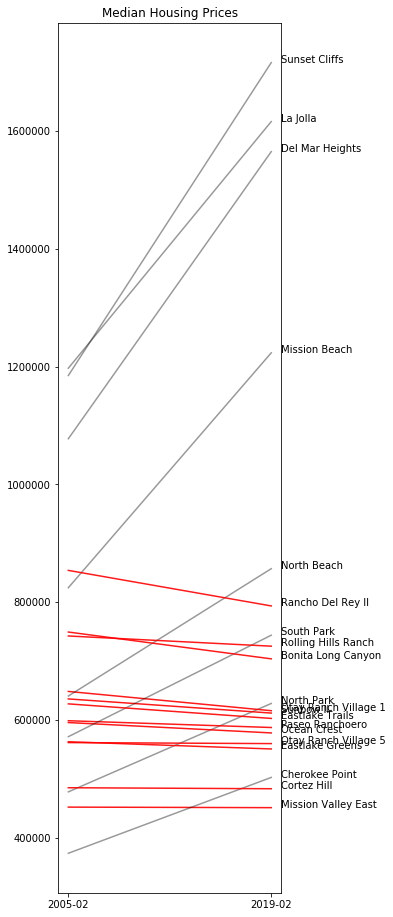

In [17]:
fig, ax = plt.subplots(figsize=(4, 16))
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 30):
        ax.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
        ax.text(1.05, df_region.value.iloc[1], region_name, transform=ax.transData)

    elif change < 0:
        ax.plot(df_region.variable, df_region.value, color = "r", alpha = .9)
        ax.text(1.05, df_region.value.iloc[1], region_name, transform=ax.transData)

plt.title("Median Housing Prices");       

Percent change is often much more interesting. 

In [18]:
# undo a pivot
df_sd_change = df_change.pivot(index = 'RegionName', columns = "variable", 
                               values = 'value')

df_sd_change.reset_index(inplace=True)

df_sd_change.head()

variable             RegionName   2005-02   2019-02
0                   Adams North  547100.0  659000.0
1                Allied Gardens  523700.0  603100.0
2                    Alta Vista  444800.0  465100.0
3         Azalea-Hollywood Park  398100.0  443200.0
4                        Bay Ho  591900.0  727800.0

We will create a new variable `percent_change` that has the percent change between the latest entry in our data with the "peak" bubble.

In [19]:
df_sd_change["percent_change"] = 100*(df_sd_change["2019-02"] - 
                                      df_sd_change["2005-02"])/df_sd_change["2005-02"]

In [20]:
np.min(df_sd_change.percent_change), np.max(df_sd_change.percent_change)

(-7.060063224446786, 48.332727052261426)

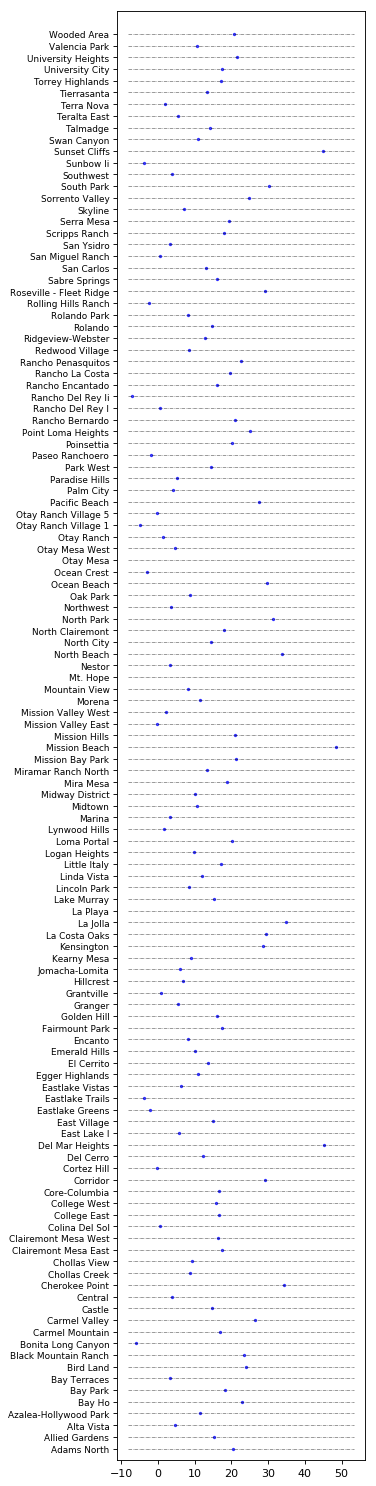

In [21]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);


ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});

ax.set_ylim(-1, 123);

Alphabetically showing data is almost never useful. It is much more informative to display in *quantitative* sort

In [22]:
df_sd_change.sort_values(["percent_change"], inplace=True)

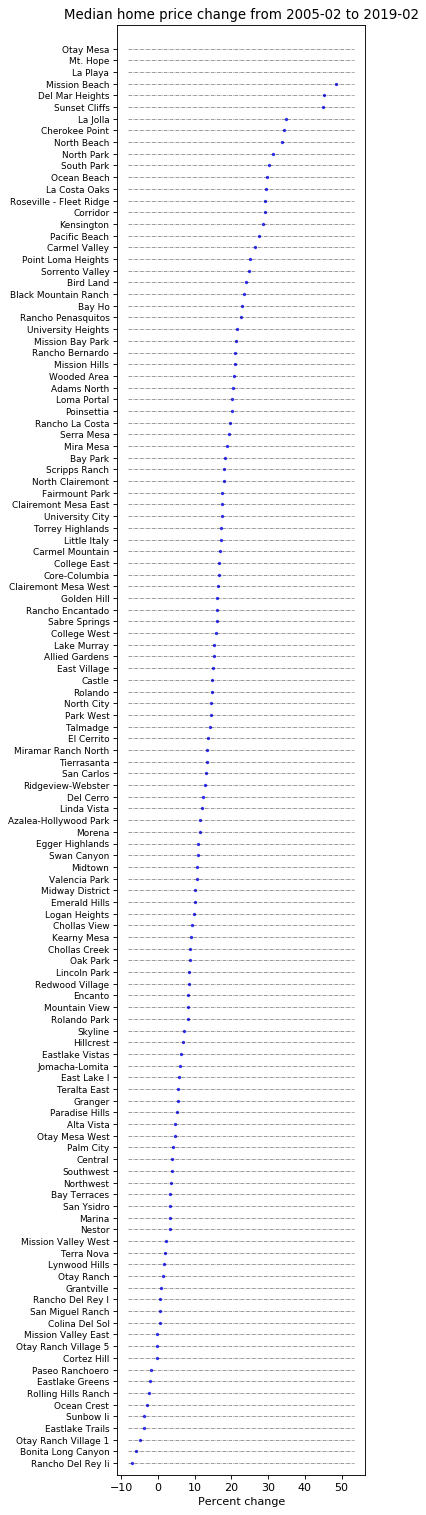

In [23]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);

ax.set_title('Median home price change from 2005-02 to 2019-02', 
             fontdict={'size':12})
ax.set_xlabel('Percent change')
ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});

ax.set_ylim(-1, 123);

## Price changes

In [24]:
monthly_change = df_sd.groupby("RegionName")["value"].apply(lambda x: 
                                                 100*x.diff()/np.hstack((1,x[:-1])))
df_sd["monthly_change"] = monthly_change
df_sd.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


RegionID          RegionName         City State               Metro  \
86     343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
88     116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
157    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
168    118673     University City    San Diego    CA  San Diego-Carlsbad   
174    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

           CountyName  SizeRank variable     value  monthly_change  
86   San Diego County        87  1996-04  139400.0             NaN  
88   San Diego County        89  1996-04  153900.0             NaN  
157  San Diego County       158  1996-04  147600.0             NaN  
168  San Diego County       169  1996-04  175700.0             NaN  
174  San Diego County       175  1996-04  202400.0             NaN

In [25]:
df_sd.describe()

RegionID      SizeRank         value  monthly_change
count   33550.000000  33550.000000  3.300100e+04    32879.000000
mean   280100.918033   2113.508197  4.355258e+05        0.501366
std    128232.200487   1618.685974  2.430293e+05        1.085763
min     46087.000000     87.000000  6.430000e+04       -7.132094
25%    267997.000000    857.000000  2.582000e+05       -0.089138
50%    273352.000000   1647.500000  3.974000e+05        0.571021
75%    343242.000000   2802.000000  5.484000e+05        1.200429
max    764288.000000   6985.000000  1.732200e+06        5.911778

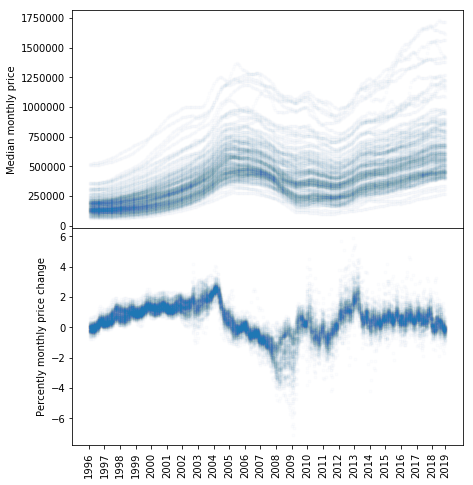

In [26]:
plt.figure(figsize=(7,8))

plt.subplot(2,1,1)
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.ylabel("Median monthly price");
plt.xticks([])

plt.subplot(2,1,2)
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Percently monthly price change")
plt.subplots_adjust(wspace=0, hspace=0)

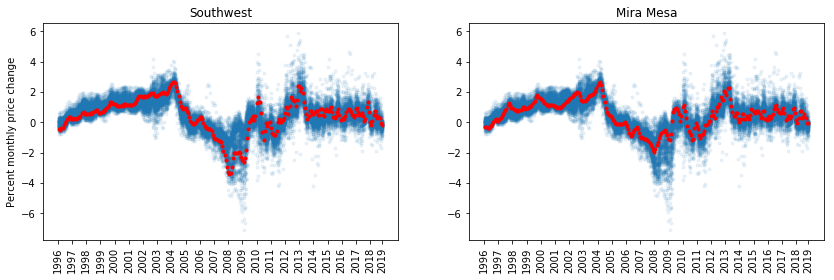

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Percent monthly price change")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



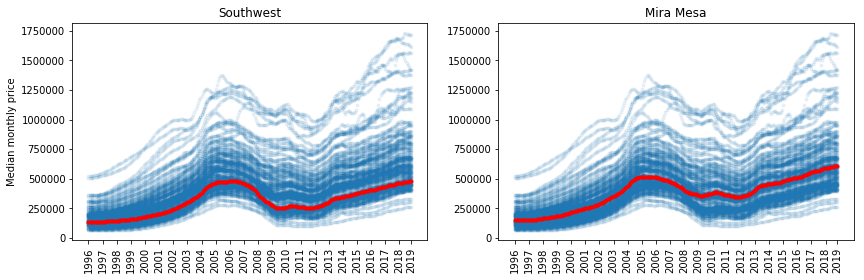

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Median monthly price")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



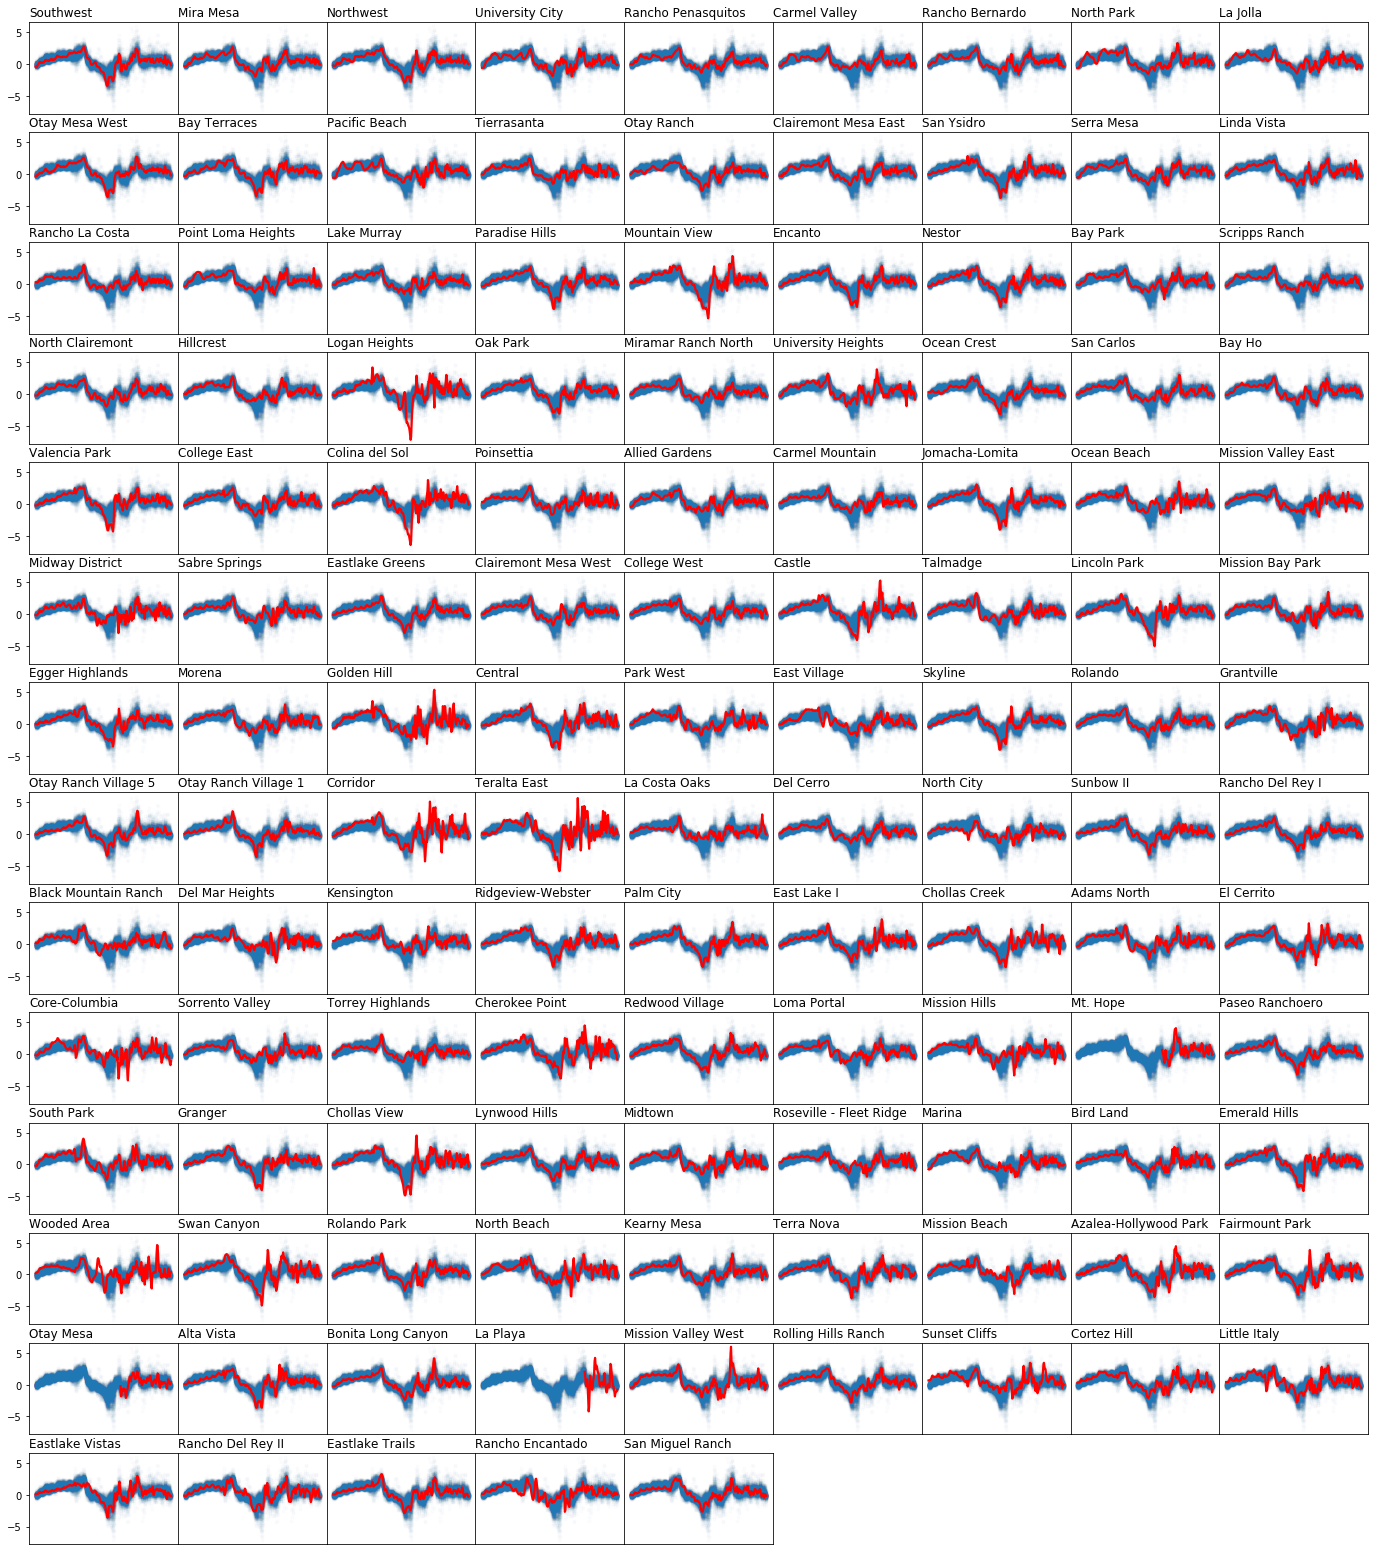

In [29]:
plt.figure(figsize = (24,28))
for i, region_name in enumerate(region_names):
    plt.subplot(14, 9, i+1)
    
    plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
    plt.xticks([]);
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.monthly_change, linewidth = 2.2, 
             color = "r", label = region_name)

    plt.xticks([]);
    if i%9 != 0:
        plt.yticks([])
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

Let's compare the distribution of percent changes between two different states: early bubble state and present state we are at in the Real Estate market. 

In [30]:
df_bubble_leadup = df_sd[(df_sd.variable>="2000-01") & (df_sd.variable<"2005-01")]

df_current_state = df_sd[(df_sd.variable>"2014-02") & (df_sd.variable<="2019-02")]

df_bubble_leadup.head()

RegionID          RegionName         City State               Metro  \
334841    343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
334843    116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
334912    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
334923    118673     University City    San Diego    CA  San Diego-Carlsbad   
334929    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

              CountyName  SizeRank variable     value  monthly_change  
334841  San Diego County        87  2000-01  172400.0        1.352146  
334843  San Diego County        89  2000-01  206300.0        1.776024  
334912  San Diego County       158  2000-01  178800.0        1.188455  
334923  San Diego County       169  2000-01  262300.0        1.587916  
334929  San Diego County       175  2000-01  291300.0        1.462905

Are the differences between the current state and the bubble state the same or different? Let's estimate some $p$-values for this.

In [31]:
from scipy import stats

In [32]:
p_vals = []
median_diffs = []
for region in region_names:
    df_bubble_leadup_region = df_bubble_leadup[df_bubble_leadup.RegionName == region].dropna()
    df_current_state_region = df_current_state[df_current_state.RegionName == region].dropna()
    if (df_bubble_leadup_region.shape[0] == 0) or (df_current_state_region.shape[0]==0):
        continue
    _, p_val = stats.ttest_ind(np.abs(df_bubble_leadup_region.monthly_change), 
                           np.abs(df_current_state_region.monthly_change))
    p_vals.append(p_val)
    
    median_diffs.append(np.median(np.abs(df_current_state_region.monthly_change)) - 
                        np.median(np.abs(df_bubble_leadup_region.monthly_change)))

## Volcano Plot

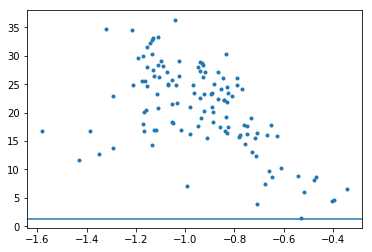

In [169]:

plt.plot(median_diffs, -np.log10(p_vals), '.');
plt.axhline(-np.log10(.05))


## Box Plot

In [172]:
df_bubble_leadup["state"] = "bubble"
df_current_state["state"] = "current"


df_box_plot = pd.concat([df_bubble_leadup, df_current_state], axis = 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


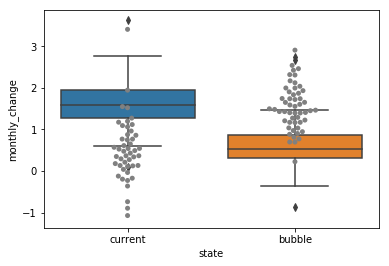

In [176]:

ax = sns.boxplot(x='state', y='monthly_change', data=df_box_plot.sample(100))

ax = sns.swarmplot(x='state', y='monthly_change', data=df_box_plot.sample(100), color="grey")
